In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the Excel file
file_path ="E Commerce Dataset.xlsx"
df = pd.read_excel(file_path,sheet_name=1)

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
# Inspect the dataframe
df.info()
# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
#data cleaning
# Drop rows with missing values
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert data types if necessary (e.g., date columns to datetime)
# df['date_column'] = pd.to_datetime(df['date_column'])

# Confirm changes
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   3774 non-null   int64  
 1   Churn                        3774 non-null   int64  
 2   Tenure                       3774 non-null   float64
 3   PreferredLoginDevice         3774 non-null   object 
 4   CityTier                     3774 non-null   int64  
 5   WarehouseToHome              3774 non-null   float64
 6   PreferredPaymentMode         3774 non-null   object 
 7   Gender                       3774 non-null   object 
 8   HourSpendOnApp               3774 non-null   float64
 9   NumberOfDeviceRegistered     3774 non-null   int64  
 10  PreferedOrderCat             3774 non-null   object 
 11  SatisfactionScore            3774 non-null   int64  
 12  MaritalStatus                3774 non-null   object 
 13  NumberOfAddress        

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.00000,3774.000000,3774.000000,3774.000000,3774.000000
mean,53017.994966,0.167197,8.776895,1.707737,15.743773,2.981187,3.754107,3.056439,4.216481,0.282194,15.72761,1.719661,2.825384,4.526232,164.213590
std,1608.979289,0.373201,7.678508,0.936725,8.594330,0.722158,1.025233,1.389730,2.562142,0.450127,3.62991,1.674508,2.467597,3.371310,24.093966
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.00000,0.000000,1.000000,0.000000,0.000000
25%,51656.250000,0.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.00000,1.000000,1.000000,2.000000,148.485000
50%,53160.500000,0.000000,8.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.00000,1.000000,2.000000,3.000000,160.050000
75%,54394.500000,0.000000,13.000000,3.000000,21.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.00000,2.000000,3.000000,7.000000,178.010000
max,55630.000000,1.000000,51.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.00000,16.000000,16.000000,46.000000,324.990000


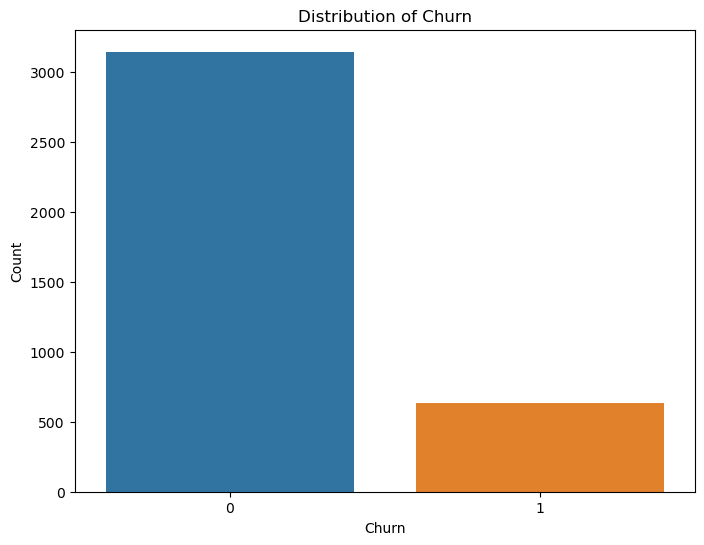

In [ ]:
#visualization of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [ ]:
from collections import Counter
import pandas as pd

# Assuming df is already defined and is a pandas DataFrame
class_distribution = Counter(df['Churn'])
print('Class Distribution:', class_distribution)


Class Distribution: Counter({0: 3143, 1: 631})


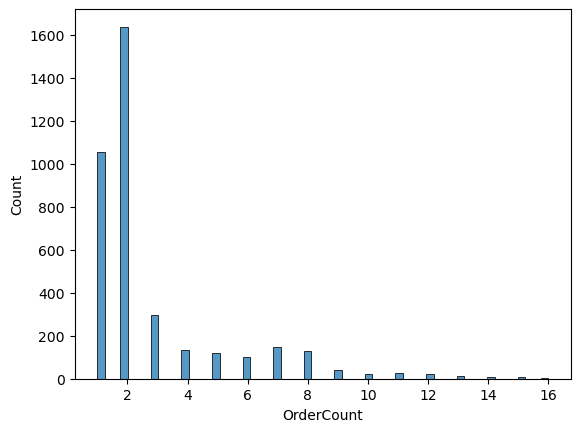

In [ ]:
# Visualize distributions of key variables
sns.histplot(df['OrderCount'])
plt.show()

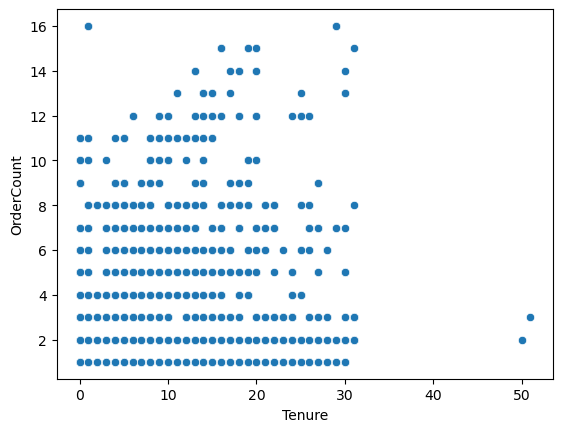

In [ ]:
# Visualize relationships between variables
sns.scatterplot(x='Tenure', y='OrderCount', data=df)
plt.show()

In [ ]:
#obj to numeric
df['PreferredLoginDevice'] = pd.to_numeric(df['PreferredLoginDevice'], errors='coerce')
df['PreferredPaymentMode'] = pd.to_numeric(df['PreferredPaymentMode'], errors='coerce')
df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce')
df['PreferedOrderCat'] = pd.to_numeric(df['PreferedOrderCat'], errors='coerce')
df['MaritalStatus'] = pd.to_numeric(df['MaritalStatus'], errors='coerce')

In [ ]:
#Fill NaN values with a default value
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].fillna(0)
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].fillna(0)
df['Gender'] = df['Gender'].fillna(0)
df['PreferedOrderCat'] = df['PreferedOrderCat'].fillna(0)
df['MaritalStatus'] = df['MaritalStatus'].fillna(0)

In [ ]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].astype(int)
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].astype(int)
df['Gender'] = df['Gender'].astype(int)
df['PreferedOrderCat'] = df['PreferedOrderCat'].astype(int)
df['MaritalStatus'] = df['MaritalStatus'].astype(int)

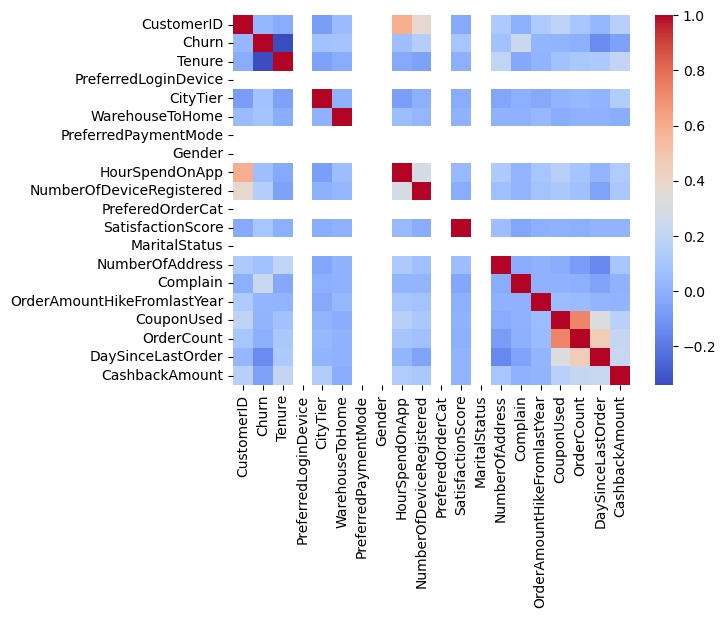

In [ ]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()


In [ ]:
#Split the data into features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
categorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
X = pd.get_dummies(X, columns=categorical_columns)

In [ ]:
# Apply SMOTE to the training data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
#Check the class distribution after applying SMOTE
print('Original training dataset shape %s' % Counter(y_train))
print('Resampled training dataset shape %s' % Counter(y_train_resampled))

Original training dataset shape Counter({0: 2534, 1: 485})
Resampled training dataset shape Counter({1: 2534, 0: 2534})


In [ ]:
# Scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [ ]:
# initializing the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),

    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

Random Forest: Accuracy - 0.33
              precision    recall  f1-score   support

           0       0.96      0.18      0.30       609
           1       0.22      0.97      0.36       146

    accuracy                           0.33       755
   macro avg       0.59      0.57      0.33       755
weighted avg       0.81      0.33      0.31       755

[[109 500]
 [  5 141]]
SVM: Accuracy - 0.81
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       609
           1       0.00      0.00      0.00       146

    accuracy                           0.81       755
   macro avg       0.40      0.50      0.45       755
weighted avg       0.65      0.81      0.72       755

[[609   0]
 [146   0]]
Decision Tree: Accuracy - 0.71
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       609
           1       0.11      0.07      0.08       146

    accuracy                           0.71       755

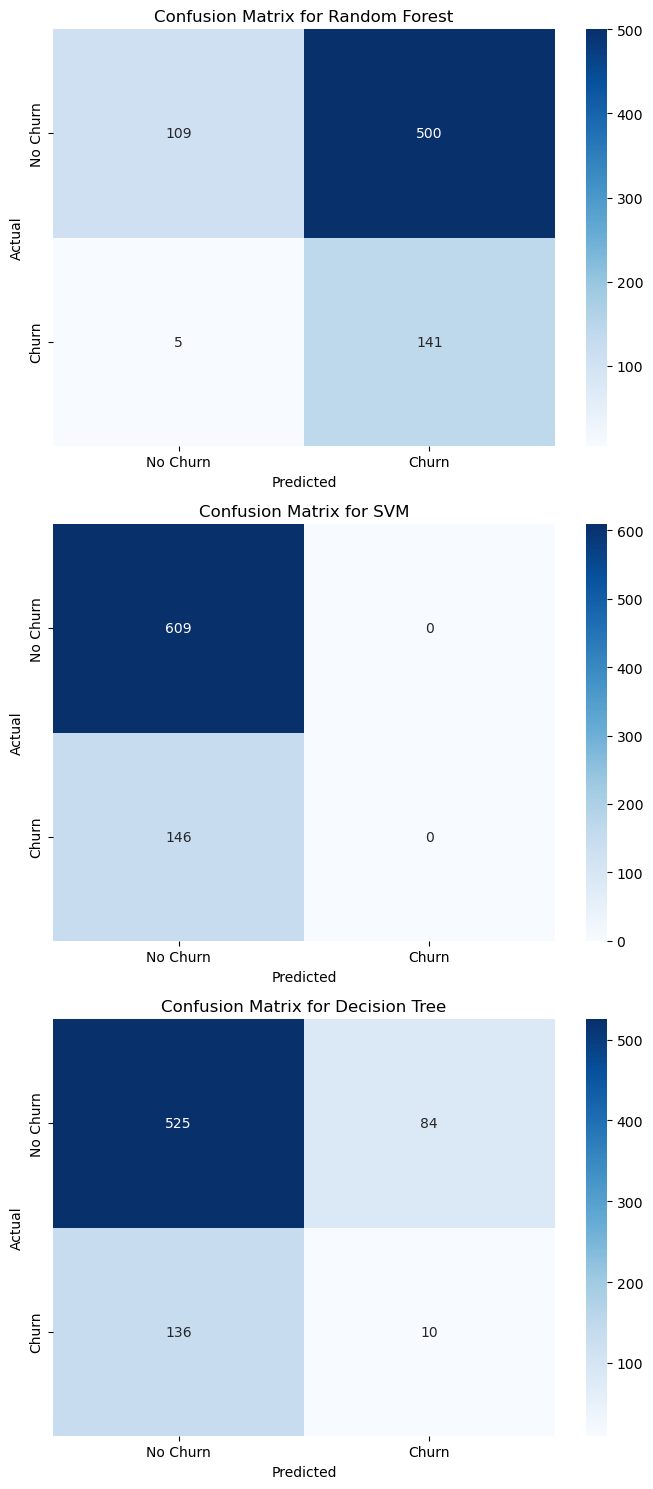


Sorted results by accuracy:
SVM: Accuracy - 0.81
Decision Tree: Accuracy - 0.71
Random Forest: Accuracy - 0.33


In [ ]:
results = {}

# Create a subplot for confusion matrices
fig, axes = plt.subplots(nrows=len(models), ncols=1, figsize=(7, 5 * len(models)))
if len(models) == 1:
    axes = [axes]  # Make sure axes is iterable

for ax, (name, model) in zip(axes, models.items()):
    # Train and predict
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name}: Accuracy - {accuracy:.2f}')
    print(classification_report(y_test, y_pred))  # Optional: Print classification report
    print(confusion_matrix(y_test, y_pred))  # Optional: Print confusion matrix

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'Confusion Matrix for {name}')

# Adjust layout
plt.tight_layout()
plt.show()


results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

# Print sorted results
print('\nSorted results by accuracy:')
for name, acc in results.items():
    print(f'{name}: Accuracy - {acc:.2f}')

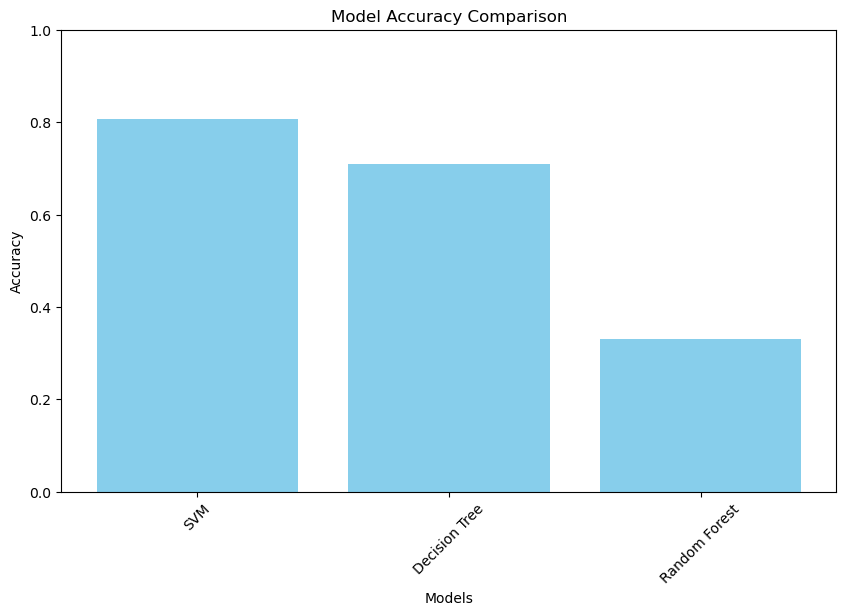

In [ ]:
# visualizing the model performance
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Assuming df is already loaded and preprocessed as described
X = df.drop('Churn', axis=1)
y = df['Churn']

# Convert categorical variables to dummy variables
categorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
X = pd.get_dummies(X, columns=categorical_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Reshape for LSTM (BiLSTM expects input shape: [samples, time steps, features])
X_train_resampled = np.expand_dims(X_train_resampled, axis=1)  # Add time dimension
X_test = np.expand_dims(X_test, axis=1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

# Build the BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train_resampled.shape[1], X_train_resampled.shape[2])))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
127/127 [==============================] - 10s 17ms/step - loss: 0.5708 - accuracy: 0.7417 - val_loss: 0.7822 - val_accuracy: 0.6272
Epoch 2/100
127/127 [==============================] - 1s 4ms/step - loss: 0.4512 - accuracy: 0.8091 - val_loss: 0.6514 - val_accuracy: 0.7219
Epoch 3/100
127/127 [==============================] - 1s 4ms/step - loss: 0.4161 - accuracy: 0.8251 - val_loss: 0.6261 - val_accuracy: 0.7357
Epoch 4/100
127/127 [==============================] - 1s 5ms/step - loss: 0.3918 - accuracy: 0.8340 - val_loss: 0.5865 - val_accuracy: 0.7367
Epoch 5/100
127/127 [==============================] - 1s 4ms/step - loss: 0.3761 - accuracy: 0.8411 - val_loss: 0.5869 - val_accuracy: 0.7229
Epoch 6/100
127/127 [==============================] - 1s 4ms/step - loss: 0.3618 - accuracy: 0.8461 - val_loss: 0.5654 - val_accuracy: 0.7406
Epoch 7/100
127/127 [==============================] - 1s 4ms/step - loss: 0.3505 - accuracy: 0.8500 - val_loss: 0.5378 - val_accuracy: 0.74

Epoch 58/100
127/127 [==============================] - 1s 5ms/step - loss: 0.0548 - accuracy: 0.9800 - val_loss: 0.2448 - val_accuracy: 0.9349
Epoch 59/100
127/127 [==============================] - 1s 5ms/step - loss: 0.0512 - accuracy: 0.9813 - val_loss: 0.2242 - val_accuracy: 0.9428
Epoch 60/100
127/127 [==============================] - 1s 4ms/step - loss: 0.0507 - accuracy: 0.9810 - val_loss: 0.2548 - val_accuracy: 0.9270
Epoch 61/100
127/127 [==============================] - 1s 4ms/step - loss: 0.0464 - accuracy: 0.9827 - val_loss: 0.2251 - val_accuracy: 0.9260
Epoch 62/100
127/127 [==============================] - 1s 4ms/step - loss: 0.0483 - accuracy: 0.9837 - val_loss: 0.2504 - val_accuracy: 0.9320
Epoch 63/100
127/127 [==============================] - 1s 5ms/step - loss: 0.0420 - accuracy: 0.9852 - val_loss: 0.3089 - val_accuracy: 0.9112
Epoch 64/100
127/127 [==============================] - 1s 4ms/step - loss: 0.0412 - accuracy: 0.9864 - val_loss: 0.3116 - val_accuracy:

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


24/24 [==============================] - 0s 3ms/step - loss: 0.5577 - accuracy: 0.9126
Test Loss: 0.5577269792556763
Test Accuracy: 0.9125827550888062


In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary outcomes


24/24 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       609
           1       0.80      0.73      0.76       146

    accuracy                           0.91       755
   macro avg       0.87      0.84      0.85       755
weighted avg       0.91      0.91      0.91       755



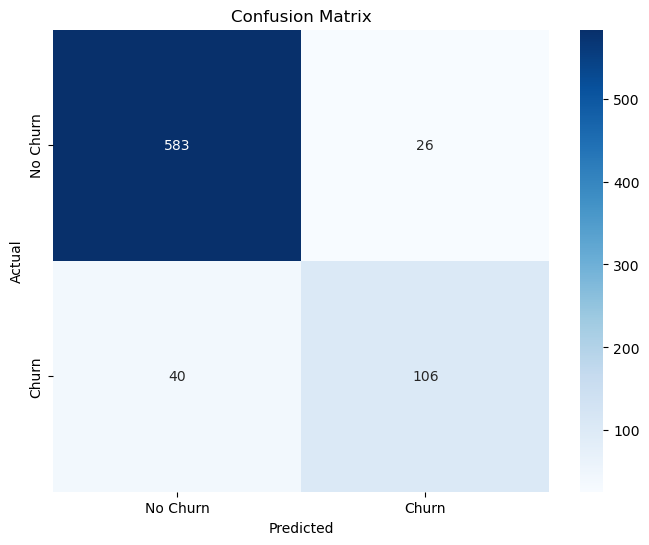

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Extract accuracy and loss from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)


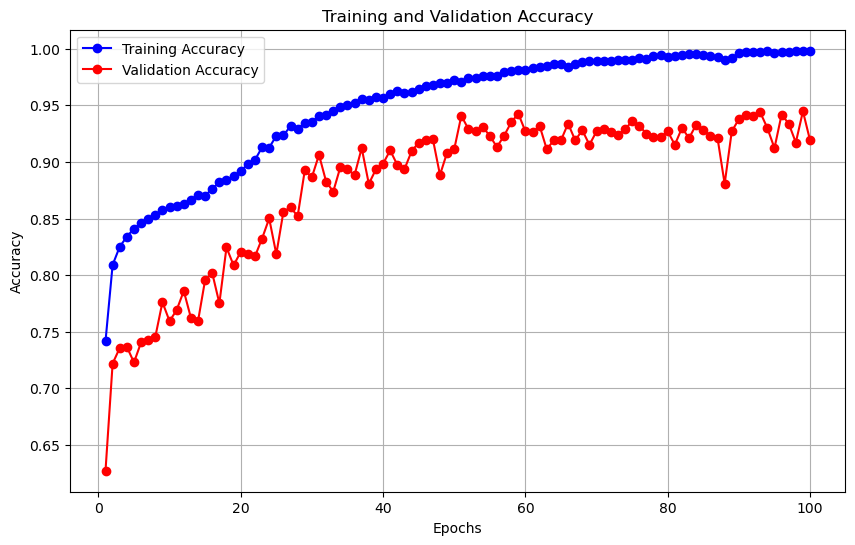

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


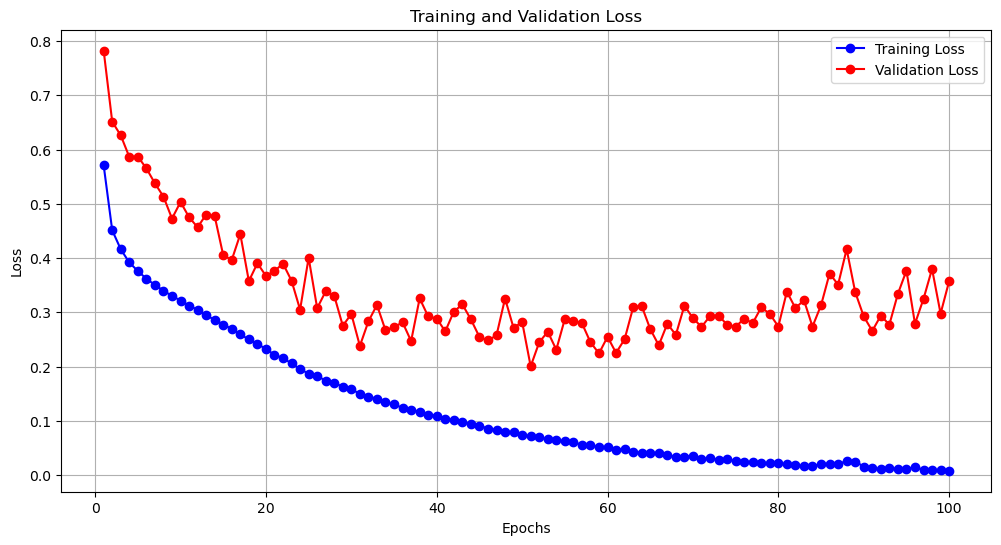

In [ ]:
# Extract loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


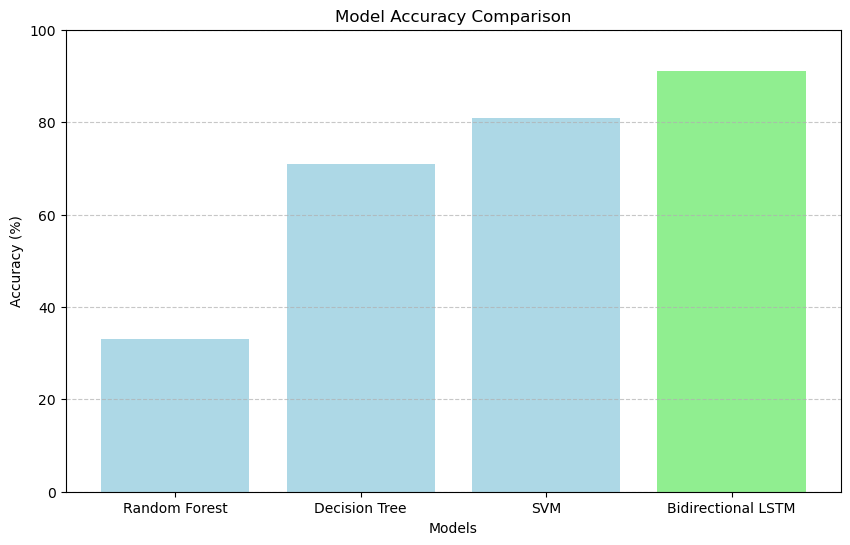

In [ ]:
import matplotlib.pyplot as plt


models = ['Random Forest', 'Decision Tree', 'SVM', 'Bidirectional LSTM']
accuracies = [acc_rf, acc_dt, acc_svm, acc_Bilstm]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['lightblue', 'lightblue', 'lightblue', 'lightgreen'])

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)  # Set the y-axis limit to 100 for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
